In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [4]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
user_name             63264 non-null object
country               82622 non-null object
review_title          82657 non-null object
review_description    82657 non-null object
designation           59010 non-null object
points                82657 non-null int64
price                 77088 non-null float64
province              82622 non-null object
region_1              69903 non-null object
region_2              35949 non-null object
winery                82657 non-null object
variety               82657 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB
None
(82657, 12)


In [5]:
#duplicates
print("Total number of examples: ", data.shape[0])
print("Number of examples with the same title and description: ", data[data.duplicated(['review_description','review_title'])].shape[0])

Total number of examples:  82657
Number of examples with the same title and description:  5016


In [6]:
data=data.drop_duplicates(['review_description','review_title'])
data=data.reset_index(drop=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77641 entries, 0 to 77640
Data columns (total 12 columns):
user_name             59105 non-null object
country               77608 non-null object
review_title          77641 non-null object
review_description    77641 non-null object
designation           55458 non-null object
points                77641 non-null int64
price                 72356 non-null float64
province              77608 non-null object
region_1              65680 non-null object
region_2              33814 non-null object
winery                77641 non-null object
variety               77641 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 7.1+ MB


In [8]:
data[['user_name','country','review_title','review_description','designation','province', 'region_1','region_2', 'winery', 'variety']].describe()


,user_name,country,review_title,review_description,designation,province,region_1,region_2,winery,variety
count,59105,77608,77641,77641,55458,77608,65680,33814,77641,77641
unique,15,38,76983,77628,26424,358,1019,17,13786,28
top,@vossroger,US,Segura Viudas NV Extra Dry Sparkling (Cava),"Dark berry, toasted hazelnut and menthol aroma...",Reserve,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,16482,36269,7,2,1301,24275,3150,7053,165,9966


Some basic exploratory data analysis (EDA) for analyzing the test data.

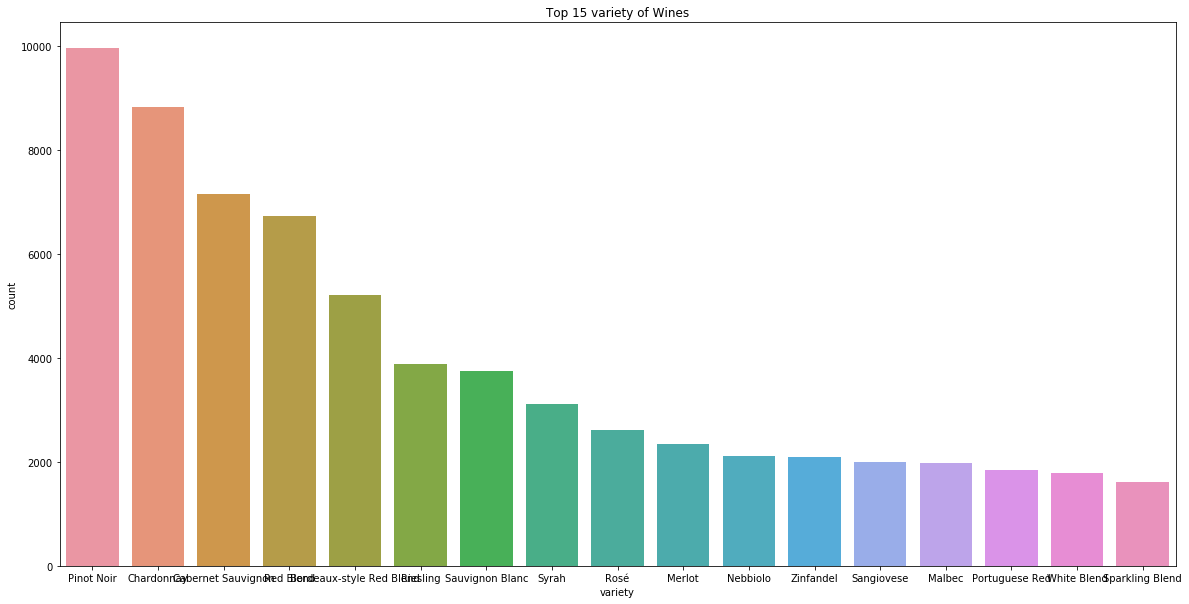

In [9]:
#Top 15 variety of wines
variety_df = data.groupby('variety').filter(lambda x: len(x) > 1500)
varieties = variety_df['variety'].value_counts().index.tolist()
plt.subplots(figsize = (20, 10))
sns.countplot(x = variety_df['variety'], order = varieties)
plt.title('Top 15 variety of Wines')
plt.show()

Number of country list in data: 38


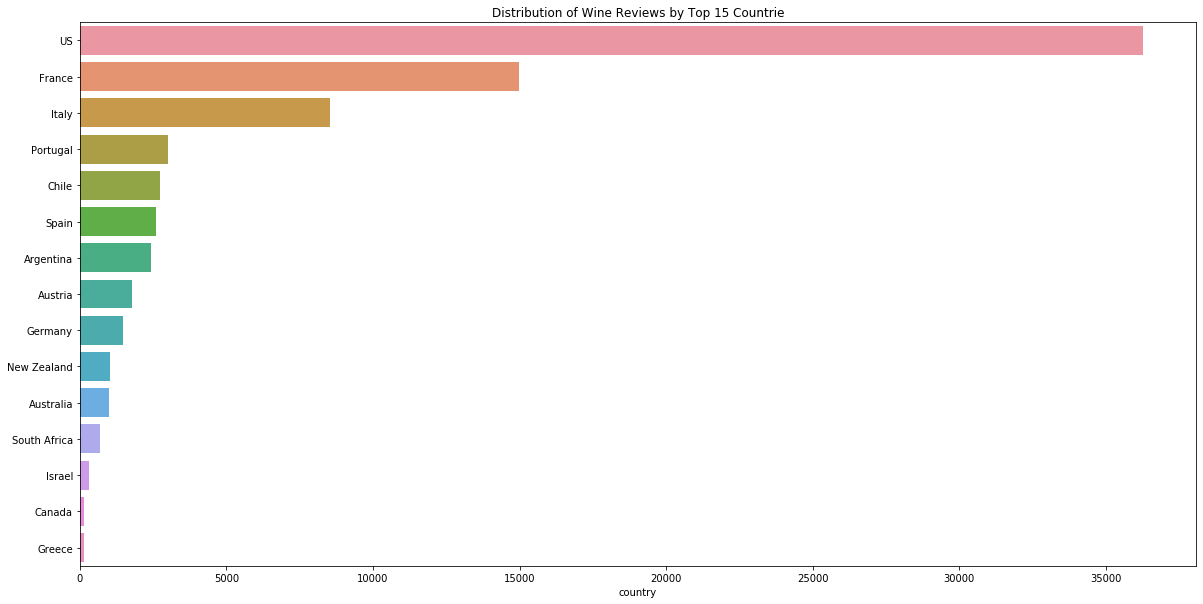

In [10]:
#Distribution of Wine Reviews by Top 15 Countries
print('Number of country list in data:',data['country'].nunique())
plt.figure(figsize=(20,10))
cnt = data['country'].value_counts().to_frame()[0:15]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt,orient='h')
plt.title('Distribution of Wine Reviews by Top 15 Countrie');
plt.show()

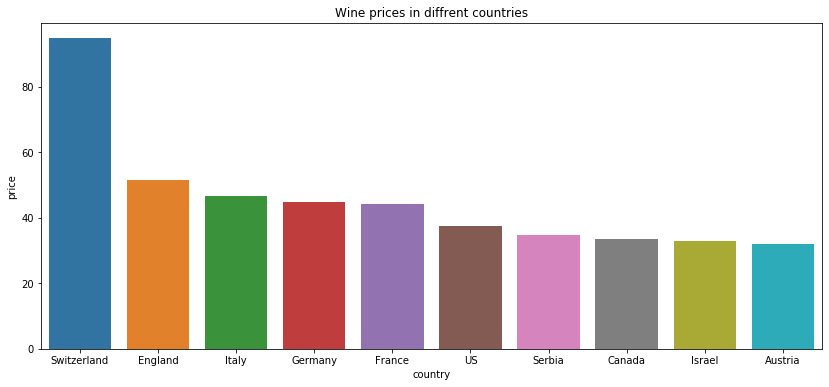

In [11]:
#Country wise wine prices
z=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

In [12]:
#Highest priced wines
data[(data['price'] > 2000)]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
29088,@mattkettmann,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Blair,Chardonnay
57505,@vossroger,France,Château les Ormes Sorbet 2013 Médoc,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Château les Ormes Sorbet,Bordeaux-style Red Blend
60464,@vossroger,France,Château Pétrus 2014 Pomerol,The wine is a velvet glove in an iron fist. Th...,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Château Pétrus,Bordeaux-style Red Blend


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016ED0A16408>],
      dtype=object)

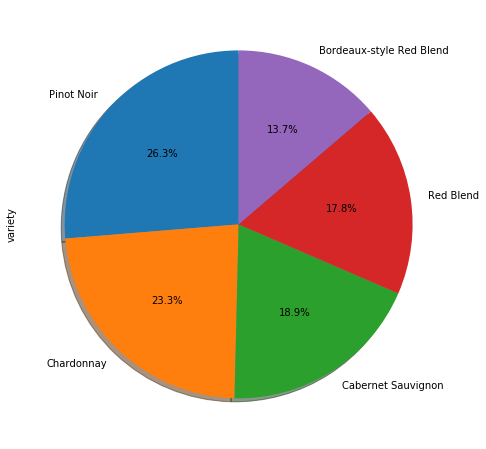

In [13]:
#top 5 type of expensive wines having the best ratings
top=data.loc[(data['price']>500)] 
top=top.loc[(top['points']>=90)]  
top5=data['variety'].value_counts()[:5]

plt.subplots(figsize=(15,8))
top5.plot(kind='pie',subplots=True,autopct='%1.1f%%',shadow=True,startangle=90)